#Homework 1 Seden Canpolat 20070001044

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def stdnorm(X):
    """
    Inputs:
    - X: A numpy array of shape (N, D)
    Returns:
    A numpy array of shape (N, D) where Y[i] contains the same data as X[i],
    but normalized to have zero mean and unit standard deviation.
    Hint: Use the axis argument for calculations along the correct axis.
    Use the keepdims argument to be able to do broadcasting.
    """

    # FILL HERE: one-line long code only, for part (b)
    return (X - np.mean(X, axis=0, keepdims=True)) / np.std(X, axis=0, keepdims=True) #right dimension

N = 10
D = 3
x_org = np.arange(1, N+1).reshape(N,1) @ np.arange(1, D+1).reshape(1,D)

# IMPLEMENT THE SAME BY THE OPERATOR *: one-line long code only, for part (a)
x_org = np.arange(1, N+1)[:, np.newaxis] * np.arange(1, D+1) #new shape

print(x_org.shape)
print(x_org)
x_norm = stdnorm(x_org)
print(x_norm)
print('Mean:', np.mean(x_norm, axis=0))
print('Std:', np.std(x_norm, axis=0))

(10, 3)
[[ 1  2  3]
 [ 2  4  6]
 [ 3  6  9]
 [ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]
 [ 8 16 24]
 [ 9 18 27]
 [10 20 30]]
[[-1.5666989  -1.5666989  -1.5666989 ]
 [-1.21854359 -1.21854359 -1.21854359]
 [-0.87038828 -0.87038828 -0.87038828]
 [-0.52223297 -0.52223297 -0.52223297]
 [-0.17407766 -0.17407766 -0.17407766]
 [ 0.17407766  0.17407766  0.17407766]
 [ 0.52223297  0.52223297  0.52223297]
 [ 0.87038828  0.87038828  0.87038828]
 [ 1.21854359  1.21854359  1.21854359]
 [ 1.5666989   1.5666989   1.5666989 ]]
Mean: [-1.11022302e-16 -1.11022302e-16 -1.11022302e-16]
Std: [1. 1. 1.]


Epoch 0, loss 1.1335146520970791
Epoch 200, loss 0.2331768432764833
Epoch 400, loss 0.18399456313941498
Epoch 600, loss 0.07194100396773226
Epoch 800, loss 0.022995553294543634
Epoch 1000, loss 0.011167713934005275
Epoch 1200, loss 0.006941561546866646
Epoch 1400, loss 0.004914442248180023
Epoch 1600, loss 0.0037573114391151984
Epoch 1800, loss 0.003019740531166859
Epoch 2000, loss 0.0025128620084366145
Epoch 2200, loss 0.0021450883165653636
Epoch 2400, loss 0.001867107991021423
Epoch 2600, loss 0.0016502000925196748
Epoch 2800, loss 0.0014765818471572107
Epoch 3000, loss 0.0013346915939859085
Epoch 3200, loss 0.0012167062218180755
Epoch 3400, loss 0.001117153480573112
Epoch 3600, loss 0.0010320965916672527
Epoch 3800, loss 0.0009586345588577299
Epoch 4000, loss 0.0008945847536514581
Epoch 4200, loss 0.0008382749349450958
Epoch 4400, loss 0.0007884032358788279
Epoch 4600, loss 0.0007439416348543291
Epoch 4800, loss 0.0007040679852121459
Epoch 5000, loss 0.0006681172431115443
Epoch 5200

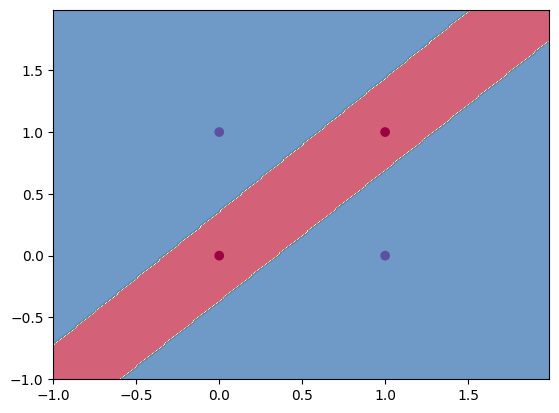

In [67]:
import numpy as np
import matplotlib.pyplot as plt

class XORModel:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.init_weights()
        self.zero_grad()

    def init_weights(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size) 
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def zero_grad(self):
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)
   
    def update_weights(self, learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)
    
    def tan_h(self, x):
        return np.tanh(x)
    
    def derivative_tan_h(self, x):
        return 1 - self.tan_h(x)**2

    def forward(self, X, Y=None):
        self.X = X
        if Y is not None:
            self.Y = Y
        
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.H1 = np.tanh(self.Z1)  
        self.Z2 = np.dot(self.H1, self.W2) + self.b2
        self.H2 = np.tanh(self.Z2) 
        
        return self.H2

    def compute_loss(self, Y_pred=None, Y=None):
        if Y_pred is None:
            Y_pred = self.H2  
        if Y is None:
            Y = self.Y        
        
        data_loss = np.mean((Y_pred - Y) ** 2)
        
        return data_loss

    def backward(self):
        Y_pred = self.H2
        Y = self.Y
        X = self.X

        dZ2 = (Y_pred - Y) * self.derivative_tan_h(self.Z2) 
        self.dW2 = np.dot(self.H1.T, dZ2) / X.shape[0]
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        dZ1 = np.dot(dZ2, self.W2.T) * self.derivative_tan_h(self.Z1)
        self.dW1 = np.dot(X.T, dZ1) / X.shape[0]
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
        


    def train_loop(self, X_train, Y_train, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            self.forward(X_train, Y_train)  
            loss = self.compute_loss()  
            self.backward()
            self.update_weights(learning_rate)
            if epoch % 200 == 0:
                print(f'Epoch {epoch}, loss {loss}')
            losses.append(loss)
        return losses    

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])


model = XORModel(input_size=2, hidden_size=2, output_size=1) 
losses = model.train_loop(X, Y, epochs=10000, learning_rate= 0.1)

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap=plt.cm.Spectral)
    plt.show()

plot_decision_boundary(model, X, Y)



In [2]:
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

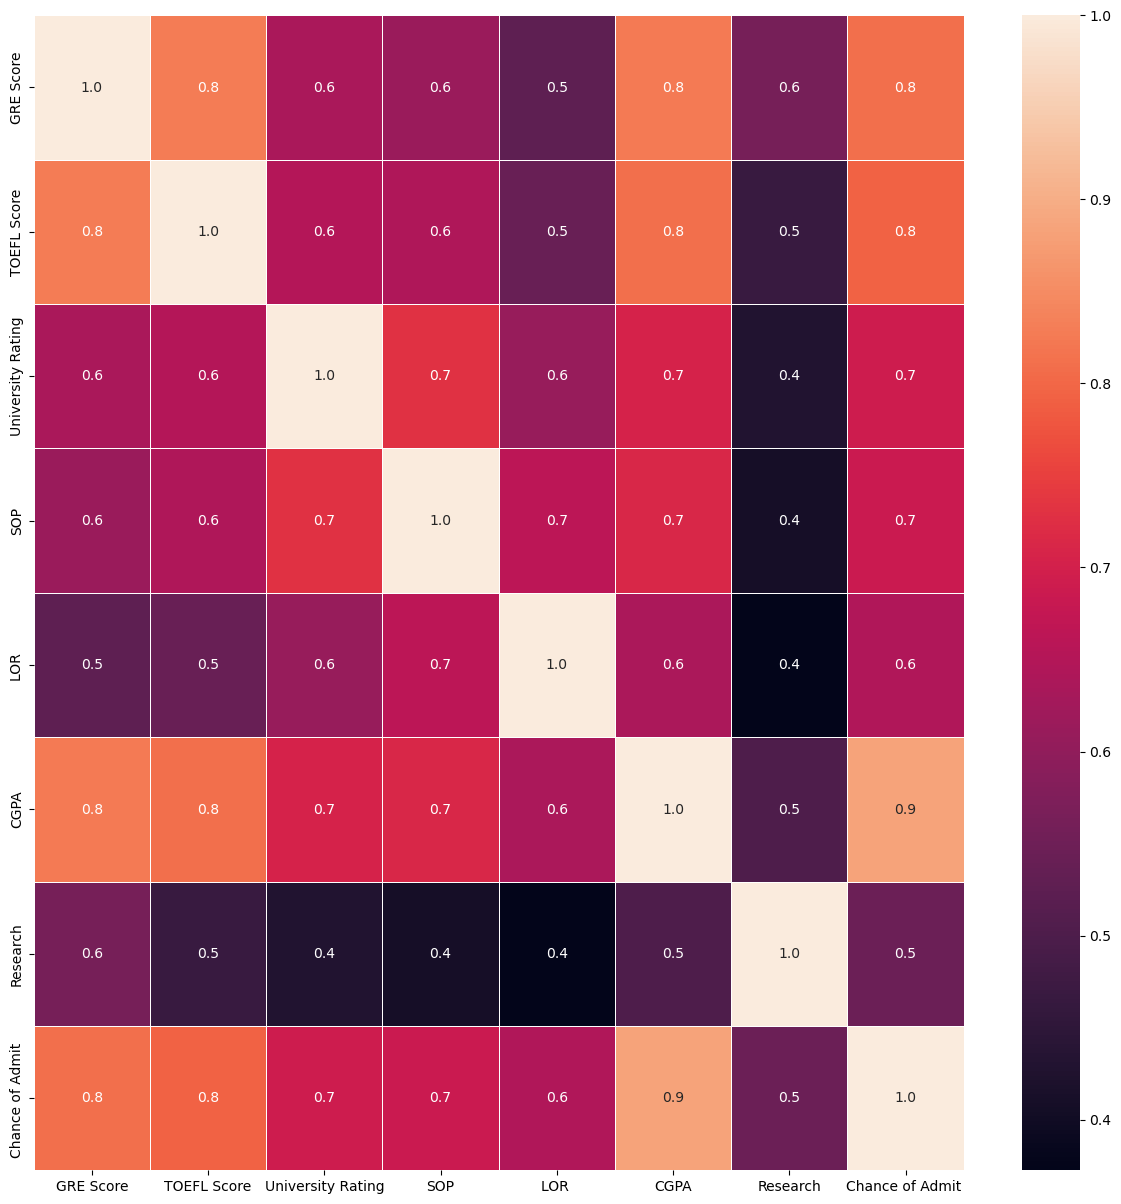

In [3]:

# Read the dataset
dataset = pd.read_csv('admissionv2.csv')
# Explore the dataset
# Observe that the scales and centers are very different which needs to be fixed,
# and the column "Serial No." is actually just the row number so it must be removed.
dataset # To print the dataset (In a jupyter notebook there is no need to use the print command)
dataset.head(10) # Or, you can print only the first 10 lines
dataset.describe() # The basic statistical description of the dataset
# Remove the useless "Serial No."
dataset.drop('Serial No.', axis=1, inplace=True)
# Let's look at the correlations across the columns.
dataset.corr() # Print the correlations
# We can see easier when we draw a correlation heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor="white", fmt= '.1f',ax=ax)
plt.show()
# Which score looks like the most related to the admission chance?

# Heatmaps shows relationships between two variables.
# In this heatmap, if the color is lighter, it means it is closer the 1 and the correlation is higher.

In [11]:
import numpy as np

class LogisticRegression:
    def __init__(self, input_size, hidden_size, output_size, batch_size, learning_rates, reg_lambda, momentum, epochs):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.learning_rates = learning_rates
        self.reg_lambda = reg_lambda
        self.momentum = momentum
        self.epochs = epochs
        self.init_weights()
        self.zero_grad()
        

    def init_weights(self):
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))
        self.velocity_W1 = 0
        self.velocity_b1 = 0
        self.velocity_W2 = 0
        self.velocity_b2 = 0

    def zero_grad(self):
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def batch_generator(self, X, Y, shuffle=True):
        num_samples = X.shape[0]
          
        if shuffle:
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = X[indices]
            Y = Y[indices]
        
        for start_idx in range(0, num_samples, self.batch_size):
            end_idx = min(start_idx + self.batch_size, num_samples)
            yield (X[start_idx:end_idx], Y[start_idx:end_idx])
                
   
    def update_weights(self):
           
            self.velocity_W1 = self.momentum * self.velocity_W1 - self.learning_rates * self.dW1
            self.velocity_b1 = self.momentum * self.velocity_b1 - self.learning_rates * self.db1
            self.velocity_W2 = self.momentum * self.velocity_W2 - self.learning_rates * self.dW2
            self.velocity_b2 = self.momentum * self.velocity_b2 - self.learning_rates * self.db2

            self.velocity_W1 += self.reg_lambda * self.W1
            self.velocity_W2 += self.reg_lambda * self.W2
        
            self.W1 += self.velocity_W1
            self.b1 += self.velocity_b1
            self.W2 += self.velocity_W2
            self.b2 += self.velocity_b2

 
    def sigmoid(self, Z):
        Z = np.clip(Z, -500, 500) 
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        s = self.sigmoid(Z)
        return s * (1 - s)

    def forward(self, X, Y=None):
        self.X = X
        if Y is not None:
            self.Y = Y
        
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.H1 = self.sigmoid(self.Z1)  
        self.Z2 = np.dot(self.H1, self.W2) + self.b2
        self.H2 = self.sigmoid(self.Z2) 
        
        return self.H2

    def compute_loss(self, Y_pred=None, Y=None):
        if Y_pred is None:
            Y_pred = self.H2  
        if Y is None:
            Y = self.Y        
        
        data_loss = self.mse_loss(Y_pred, Y) + self.L2_regularization(self.W1) + self.L2_regularization(self.W2)        
        return data_loss
    
    def mse_loss(self, y_pred, y_actual):
        return np.mean((y_pred - y_actual) ** 2)

    def L2_regularization(self, W):
        return self.reg_lambda * np.sum(W ** 2)  #L2 regularization = λ * Σ(wi^2)

    def backward(self):
        Y_pred = self.H2
        Y = self.Y
        X = self.X

        dZ2 = (Y_pred - Y) * self.sigmoid_derivative(self.Z2) 
        self.dW2 = np.dot(self.H1.T, dZ2) / X.shape[0]
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1) 
        self.dW1 = np.dot(X.T, dZ1) / X.shape[0]
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
            
        

    def train_loop(self, X_train, Y_train):
        self.X = X_train
        self.Y = Y_train
        losses = []
        for epoch in range(self.epochs):
            for X_batch, Y_batch in self.batch_generator(X_train, Y_train, self.batch_size):
                self.forward(X_batch, Y_batch)
                loss = self.compute_loss()
                self.backward()
                self.update_weights()
                #if epoch % 100 == 0:
                #    print(f'Epoch {epoch}, loss {loss}')
                losses.append(loss)
        return losses   

R²(R-squared) formula is:  R² = 1 - (Σ (y_i - ŷ_i)² / Σ (y_i - ȳ)²) 
y_i: Actual value
ŷ_i: Predicted value by the model
ȳ: Mean of the actual values
Σ: Summation across all data points from i=1 to n
n: number of observations 
Explanation: Statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. It shows how well the data fit the regression model.
Range: The range of R² is from -∞ to 1 in some cases due to the model being worse than the mean model, but typically it's considered to be from 0 to 1. 0 is for terrible prediction, no explain of the variability of the response data around its mean and 1 is for all variance explained by the model. Higher the R², the more variation is explained by your input variable and hence better is for the model.


RMSE(Root Mean Squared Error) formula is: √(Σ (y_i - ŷ_i)²) / n
y_i: Actual value
ŷ_i: Predicted value by the model
Σ: Summation across all data points from i=1 to n
n: number of observations
Explanation: RMSE represents the square root of the average squared differences between predicted and observed outcomes. It is a metric predominantly utilized in regression analysis and forecasting, where accuracy matters significantly.
Range: The values of RMSE  from 0 to ∞. RMSE values are always non-negative, and a value of 0 is a perfect fit for the data. As RMSE increases, it means there are larger errors in the model's predictions. The lower the RMSE, the better the model's ability to predict accurately.


In [7]:
# Let's prepare the dataset for the experimentation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Separate the targets from the inputs
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,7].values.reshape(-1,1) # Chance of admission
# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)
# Split the training and validation sets (ensuring the same split always)
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.30,
shuffle=False, random_state=1)
# Preprocessing (by standard normalization since we observed quite different scales/centers)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # We fit the scaler only on the training set
x_valid = scaler.transform(x_valid) # We use the resulting fit on the validation set (always!)
print(x_train.shape, x_valid.shape)


(350, 7) (150, 7)


Best R2 Score: 0.8431490725713466
Best RMSE: 0.056557143299799655


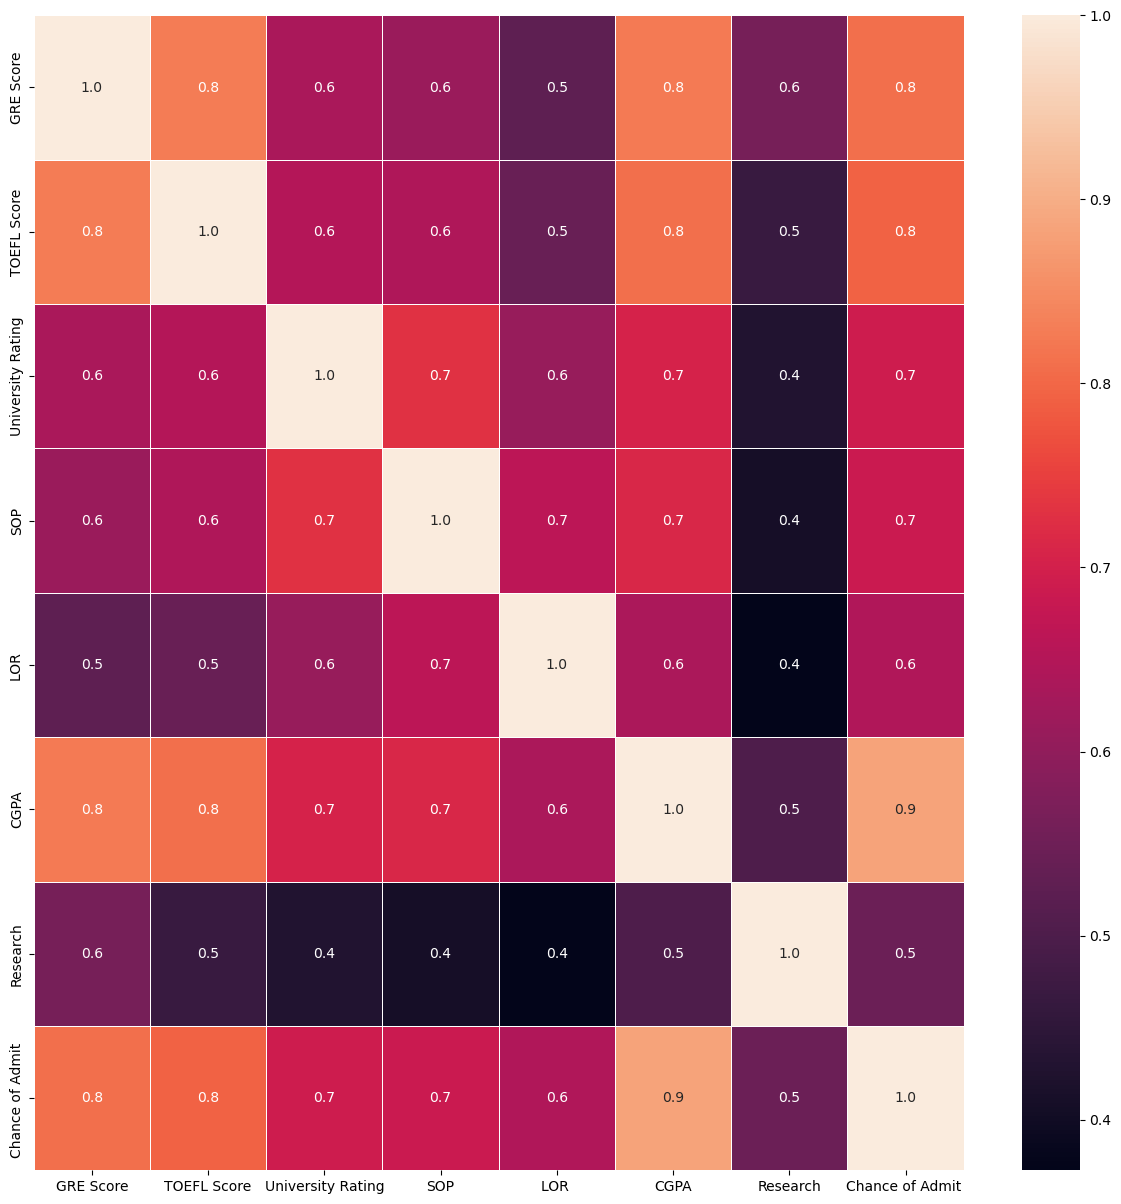

In [12]:

hidden_sizes = [5, 10, 20, 50, 100]
learning_rates = [0.1, 0.01, 0.001]
epochs = [50, 100]
batch_sizes = [10, 20, 30]
reg_lambdas = [0.0001, 0.001, 0.01] #regularization strength
momentums = [0.9, 0.99] 

def root_mean_squared_error(y_pred, y_actual):
    return np.sqrt(np.mean((y_pred - y_actual) ** 2))

best_r2 = -100
best_rmse = 100 

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for epoch in epochs:
            for batch_size in batch_sizes:
                for reg_lambda in reg_lambdas:
                    for momentum in momentums:
                        regr = LogisticRegression(input_size=7, output_size=1,
                            hidden_size=hidden_size,
                            learning_rates = learning_rate,
                            epochs = epoch,
                            batch_size = batch_size,
                            reg_lambda = reg_lambda,
                            momentum = momentum
                            )
                        regr.train_loop(x_train, y_train)
                        y_pred = regr.forward(x_valid)
                        r2 = r2_score(y_valid, y_pred)
                        rmse = root_mean_squared_error(y_valid, y_pred)
                        if r2 > best_r2:
                            best_r2 = r2

                        if rmse < best_rmse:
                            best_rmse = rmse  
                            
print("Best R2 Score:", best_r2)
print("Best RMSE:", best_rmse) 


dataset.corr() # Print the correlations
# We can see easier when we draw a correlation heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor="white", fmt= '.1f',ax=ax)
plt.show()
# Which score looks like the most related to the admission chance?



Best R2 Score: 0.4565045414930726
Best RMSE: 0.1052790310951954


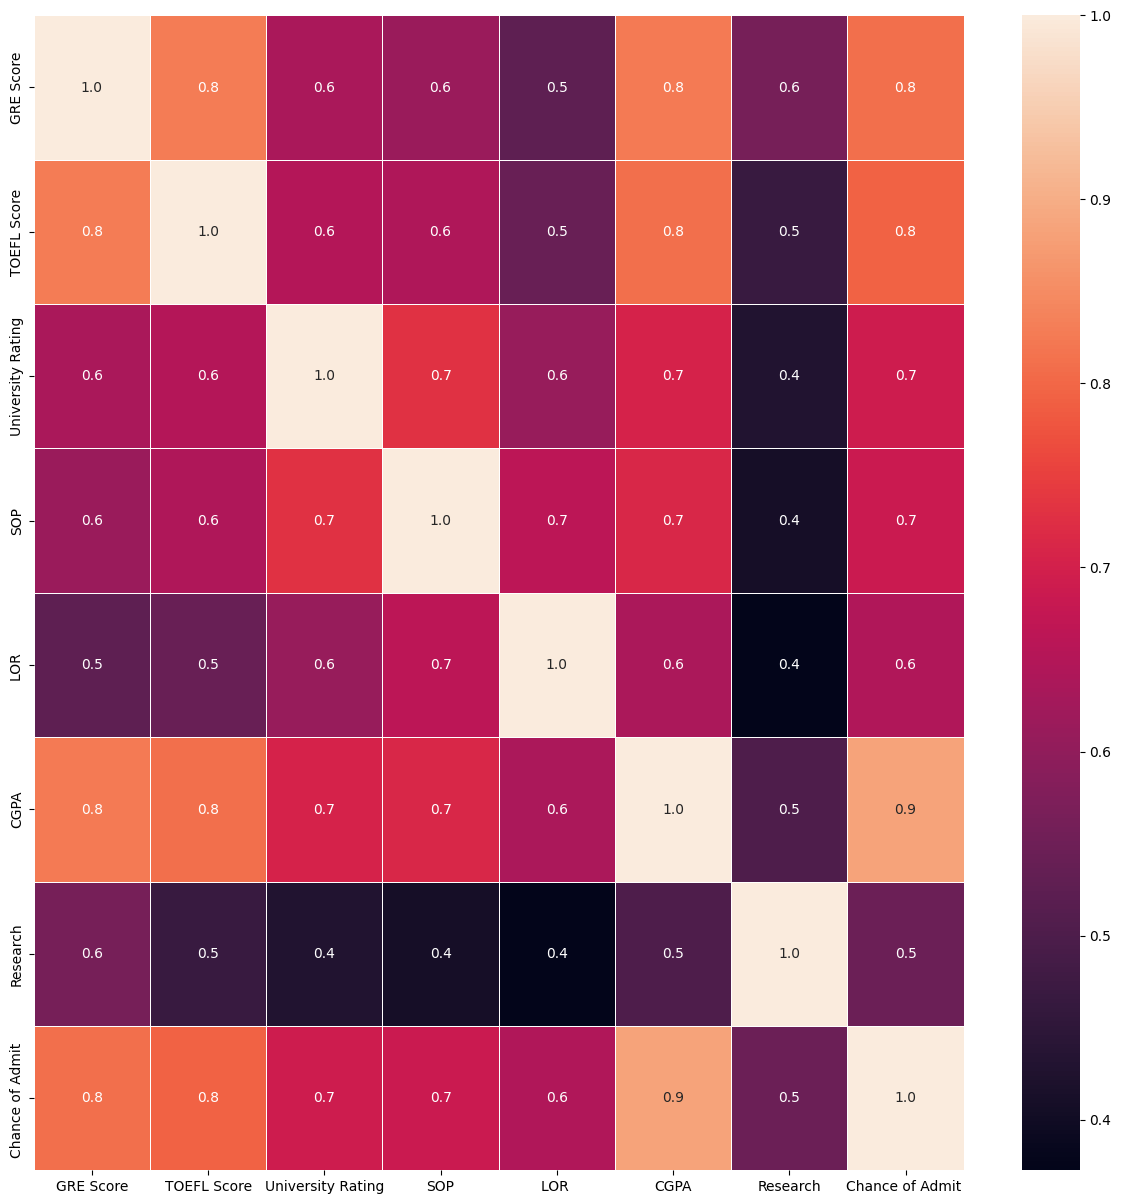

In [186]:
from sklearn.neural_network import MLPRegressor

hidden_sizes = [100, 200, 500, 1000]
learning_rates = [0.1, 0.01, 0.001, 0.2, 0.3]
epochs = [1000, 2000, 500, 200, 5000, 100, 20, 50]
batch_sizes = [16, 32, 64, 128, 256, 512]
reg_lambdas = [0.0001, 0.001, 0.01] #regularization strength
momentums = [0.2, 0.4, 0.6, 0.9, 0.99, 0.999, 0.7] 
alpha = [0.0001, 0.001, 0.01]

def root_mean_squared_error(y_pred, y_actual):
    return np.sqrt(np.mean((y_pred - y_actual) ** 2))

best_r2 = -100
best_rmse = 100 

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for epoch in epochs:
            for batch_size in batch_sizes:
                for reg_lambda in reg_lambdas:
                    for momentum in momentums:
                        regr = MLPRegressor(hidden_layer_sizes=hidden_sizes,
                                learning_rate='constant',
                                learning_rate_init=learning_rates ,
                                activation='logistic',
                                solver='sgd',
                                random_state=1,
                                max_iter=epochs,
                                verbose=0,
                                batch_size=batch_sizes,
                                alpha=alpha,
                                momentum=momentums,
                                nesterovs_momentum=False
                                )
                        r2 = r2_score(y_valid, y_pred)
                        rmse = root_mean_squared_error(y_valid, y_pred)
                        if r2 > best_r2:
                            best_r2 = r2

                        if rmse < best_rmse:
                            best_rmse = rmse  
                            
print("Best R2 Score:", best_r2)
print("Best RMSE:", best_rmse) 


# Let's look at the correlations across the columns.
dataset.corr() # Print the correlations
# We can see easier when we draw a correlation heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, linecolor="white", fmt= '.1f',ax=ax)
plt.show()
# Which score looks like the most related to the admission chance?

# CGPA are the most related to the admission chance.
# GRE Score and TOEFL are have highest correlations to each other with both GRE Score and TOEFL for CGPA.
# Also, they have high admission chance.